In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [3]:
dataset = pd.read_csv("./Ak-new-csv.csv")
dataset.head()

,DATE,Day of Week,MALE,FEMALE,CHILDREN,TOTAL,TITHE,OFFERING,Amount,REMARK
0,01/05/2019,Wednesday,48.0,64.0,10.0,122.0,13600,27350,40950,bible study
1,03/05/2019,Friday,25.0,23.0,6.0,54.0,0,66290,66290,miracle service
2,05/05/2019,Sunday,162.0,177.0,0.0,339.0,628660,153815,782475,pnuema worship
3,08/05/2019,Wednesday,61.0,88.0,4.0,153.0,148500,3900,152400,bible study
4,10/05/2019,Friday,21.0,30.0,0.0,51.0,0,16600,16600,miracle service


In [4]:
dataset.shape

(677, 10)

In [5]:
dataset.isnull().sum()

DATE             0
Day of Week      0
MALE           207
FEMALE         207
CHILDREN       207
TOTAL          202
TITHE            0
OFFERING         0
Amount           0
REMARK           0
dtype: int64

In [6]:
dataset.columns = dataset.columns.str.lower()

In [7]:
dataset.columns

Index(['date', 'day of week', 'male', 'female', 'children', 'total', 'tithe',
       'offering', 'amount', 'remark'],
      dtype='object')

In [8]:
series_data = dataset.loc[:, ['date', 'total', 'amount']]
series_data

,date,total,amount
0,01/05/2019,122.0,40950
1,03/05/2019,54.0,66290
2,05/05/2019,339.0,782475
3,08/05/2019,153.0,152400
4,10/05/2019,51.0,16600
...,...,...,...
672,17/02/2023,43.0,11930
673,18/02/2023,116.0,15460
674,19/02/2023,604.0,1457100
675,22/02/2023,152.0,28400


In [9]:
date_arrays = []
for i in series_data["date"].values:
    d = i.split("/")
    vals = d[1:]
    date_join = "/".join(vals)
    date_arrays.append(date_join)
series_data["month_year"] = date_arrays

In [10]:
series_data

,date,total,amount,month_year
0,01/05/2019,122.0,40950,05/2019
1,03/05/2019,54.0,66290,05/2019
2,05/05/2019,339.0,782475,05/2019
3,08/05/2019,153.0,152400,05/2019
4,10/05/2019,51.0,16600,05/2019
...,...,...,...,...
672,17/02/2023,43.0,11930,02/2023
673,18/02/2023,116.0,15460,02/2023
674,19/02/2023,604.0,1457100,02/2023
675,22/02/2023,152.0,28400,02/2023


In [11]:
mean_t = series_data['total'].mean()
std_t = series_data['total'].std()
def fillna(value):
    if value != np.nan:
        value = np.random.normal(loc=mean_t, scale=std_t)
    return np.abs(int(value))

In [12]:
series_data.loc[:, 'total'] = series_data.loc[:, 'total'].apply(lambda x: fillna(x))

In [13]:
series_data.isnull().sum()

date          0
total         0
amount        0
month_year    0
dtype: int64

In [14]:
series_data

,date,total,amount,month_year
0,01/05/2019,356.0,40950,05/2019
1,03/05/2019,24.0,66290,05/2019
2,05/05/2019,154.0,782475,05/2019
3,08/05/2019,27.0,152400,05/2019
4,10/05/2019,254.0,16600,05/2019
...,...,...,...,...
672,17/02/2023,354.0,11930,02/2023
673,18/02/2023,407.0,15460,02/2023
674,19/02/2023,361.0,1457100,02/2023
675,22/02/2023,549.0,28400,02/2023


In [15]:
series_data = series_data.groupby("month_year")[["total", "amount"]].mean()
series_data = series_data.reset_index()
series_data.head()


,month_year,total,amount
0,01/2020,372.312500,105076.875000
1,01/2021,255.666667,244315.833333
2,01/2022,304.900000,156240.750000
3,01/2023,211.400000,163527.500000
4,02/2020,237.000000,452970.909091


In [16]:
series_data

,month_year,total,amount
0,01/2020,372.312500,105076.875000
1,01/2021,255.666667,244315.833333
2,01/2022,304.900000,156240.750000
3,01/2023,211.400000,163527.500000
4,02/2020,237.000000,452970.909091
5,02/2021,402.750000,449768.750000
6,02/2022,298.125000,462360.937500
7,02/2023,325.571429,352132.857143
8,03/2020,237.750000,499745.833333
9,03/2021,290.076923,233314.230769


In [17]:
series_data['total'] = series_data['total'].astype(np.int64)
series_data['amount'] = series_data['amount'].astype(np.int64)

In [18]:
amount_series = series_data.drop('total', axis=1)
attendance_series = series_data.drop('amount', axis=1)

In [19]:
amount_series.head()

,month_year,amount
0,01/2020,105076
1,01/2021,244315
2,01/2022,156240
3,01/2023,163527
4,02/2020,452970


In [20]:
attendance_series.head()

,month_year,total
0,01/2020,372
1,01/2021,255
2,01/2022,304
3,01/2023,211
4,02/2020,237


In [21]:
amount_series = amount_series.set_index('month_year')


In [22]:
attendance_series = attendance_series.set_index('month_year')

In [23]:
amount_series

,amount
month_year,
01/2020,105076
01/2021,244315
01/2022,156240
01/2023,163527
02/2020,452970
02/2021,449768
02/2022,462360
02/2023,352132
03/2020,499745


In [24]:
attendance_series

,total
month_year,
01/2020,372
01/2021,255
01/2022,304
01/2023,211
02/2020,237
02/2021,402
02/2022,298
02/2023,325
03/2020,237


## INCOME

In [25]:
import matplotlib.pyplot as plt

In [26]:
amount_series = amount_series.sort_index()

In [27]:
index =  pd.to_datetime(amount_series.index)

In [28]:
amount_series.index = index

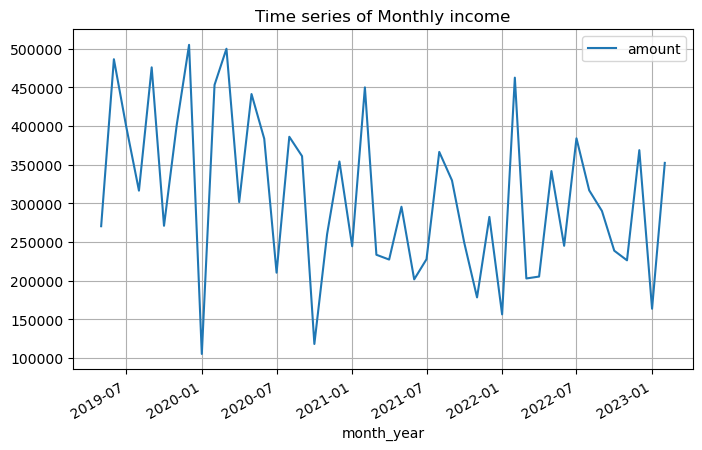

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
amount_series.plot(kind='line', ax=ax, grid=True)
ax.set_title("Time series of Monthly income")
plt.show()

**Time Series Decomposition:**   
A time series is usually composed of the following components:
   > **1) Trend :** This component usually is increasing, decreasing, or constant.  
   > **2) Seasonality :** This is the periodic behavior of the time series that occurs within a year.   
   > **3) Residual :** This is what remains of the time series after the trend and seasonality are removed.  

The basic approach to seasonal decomposition splits the time series into above components.

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

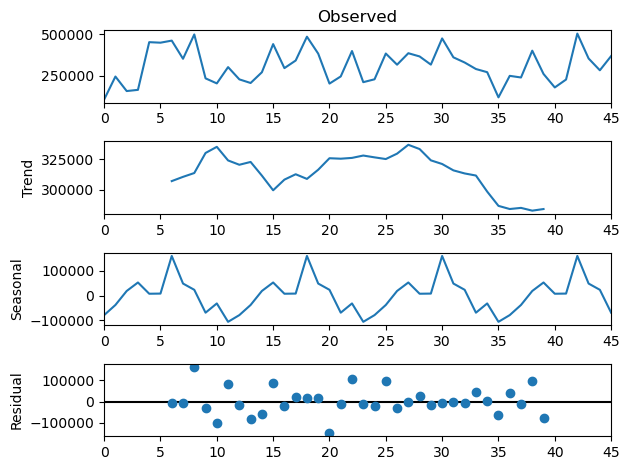

In [31]:
decompose_add = seasonal_decompose(amount_series.values, period=12)
decompose_add.plot()
plt.show()

**Stationary Time Series :**   
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict

Sign of obvious trends, seasonality, or other systematic structures in the series are indicators of a non-stationary series. A more accurate method would be to use a statistical test, such as the Dickey-Fuller test.

**ADFuller Test:**  
If Test statistic < Critical Value and p-value < 0.05 – then series is stationary

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
# functon for adf test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)


In [34]:
# calling adf function and passing series
adf_test(amount_series.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                 -4.542659
p-value                         0.000165
#Lags Used                      4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


**The p-value obtained is less than significance level of 0.05 and the ADF statistic is less than any of the critical values. Hence the zero ordered differenced series is stationary and d=0**



---



---



**Autocorrelation and Partial Autocorrelation Function:**  
Autocorrelation and partial autocorrelation are plots that graphically summarize the impact of observations at prior timesteps on the observations we are trying to predict.

**ACF plot gives the q value and PACF gives the p value**  
Look for tail of pattern in either ACF or PACF. If tail is crossing the blue region then it will give us potential p and q values.

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

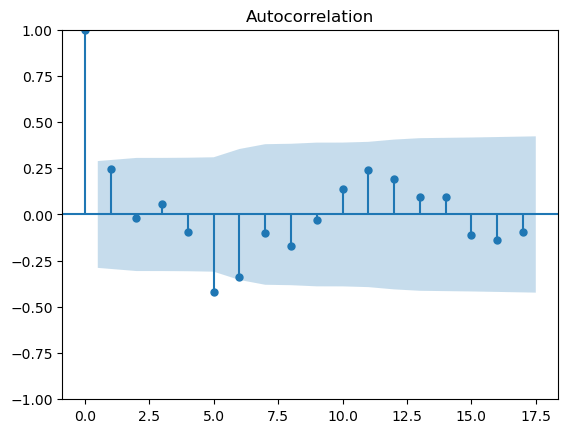

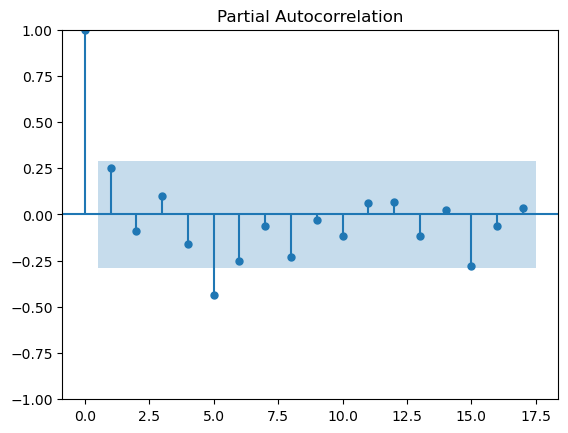

In [36]:
# if the series is not stationary then make sure to pass differenced series instead of original series
plot_acf(amount_series);
plot_pacf(amount_series);


1.   From ACF plot we can see that q value 5
2.   From PACF plot we can see that p value 5




### Split dataset to Train and Test

In [37]:
amount_series

,amount
month_year,
2020-01-01,105076
2021-01-01,244315
2022-01-01,156240
2023-01-01,163527
2020-02-01,452970
2021-02-01,449768
2022-02-01,462360
2023-02-01,352132
2020-03-01,499745


In [38]:
amount_series.index = pd.to_datetime(amount_series.index, format='%m/%Y')
amount_series = amount_series.sort_index()

In [39]:
train_df = amount_series.loc[:'2022-05-01']
test_df = amount_series.loc['2022-06-01':]

In [40]:
train_df.shape

(37, 1)

In [41]:
test_df.shape

(9, 1)

### Time series forecasting

In [42]:
!pip install prophet --q

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#### **Exponential Smoothing:**  
Exponential smoothing is a time series forecasting method for univariate data. There are three main types of exponential smoothing time series forecasting methods.
A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

##### **Single Exponential Smoothing**

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

In [45]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(9)

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='month_year'>

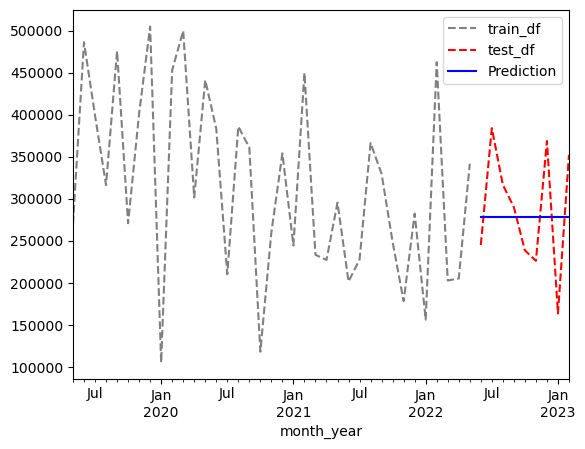

In [46]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [47]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 113756.53678695635
Test RMSE: 70722.10552380735
Train MAPE: 0.380806627037971
Test MAPE: 0.23607630774843102


##### **Double Exponential Smoothing**
   
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series

In [48]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(9)

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


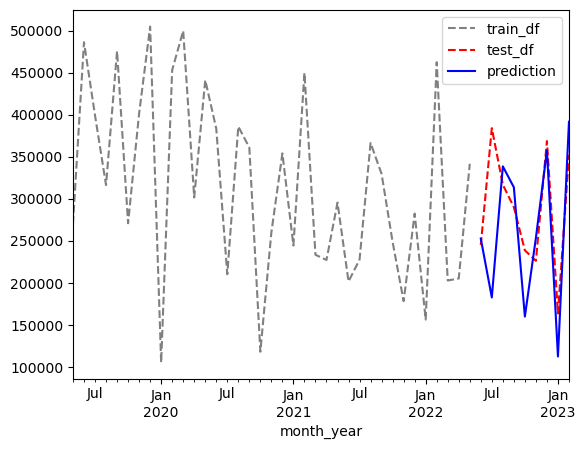

In [49]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [50]:
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 79520.84228241336
Test RMSE: 76647.64527420724
Train MAPE: 0.2654759246148177
Test MAPE: 0.17904975156104672


##### **Triple Exponential Smoothing**
Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series. Also known as Holt-Winters Exponential Smoothing.

In [51]:
hw_model = ExponentialSmoothing(train_df['amount'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(9)

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


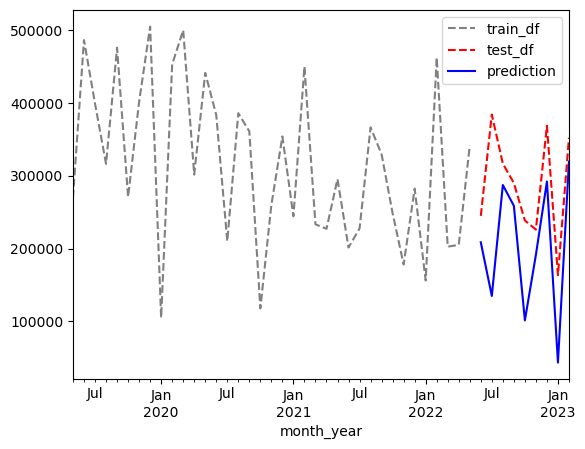

In [52]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [53]:
print('Train RMSE:',mean_squared_error(train_df, hw_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, hw_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, hw_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, hw_test_pred))

Train RMSE: 74902.12119724185
Test RMSE: 108760.70346207492
Train MAPE: 0.23515133903576746
Test MAPE: 0.3066311320524492


#### **ARIMA**

A popular and widely used statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. The parameters of the ARIMA model are defined as follows:

>**p** : The number of lag observations included in the model, also called the lag order.   
>**d** : The number of times that the raw observations are differenced, also called the degree of differencing.   
>**q** : The size of the moving average window, also called the order of moving average.

In [54]:
ar = ARIMA(train_df, order=(5,0,5)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(9)

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


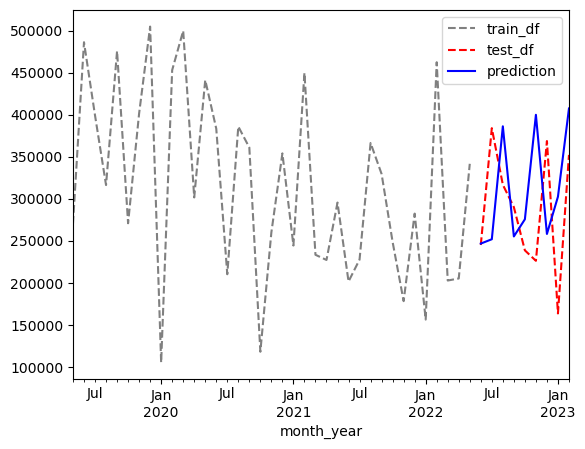

In [55]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [56]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 81509.49851440372
Test RMSE: 99770.91820900704
Train MAPE: 0.2778274567824601
Test MAPE: 0.3244145389935259


In [57]:
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [58]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [59]:
p = range(0, 5, 1)
d = 0
q = range(0, 5, 1)
P = range(0, 5, 1)
D = 0
Q = range(0, 5, 1)
s = parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

625


In [60]:
result_df = optimize_SARIMA(parameters_list, 0, 0, 5, train_df)


  0%|          | 0/625 [00:00<?, ?it/s]

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

In [61]:
result_df

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 2, 1)",10.000000
1,"(3, 3, 0, 0)",962.737389
2,"(3, 3, 1, 0)",963.568784
3,"(3, 3, 0, 2)",963.678247
4,"(3, 3, 0, 1)",964.565489
...,...,...
619,"(0, 1, 4, 3)",1037.035106
620,"(0, 1, 3, 4)",1037.035948
621,"(0, 2, 4, 4)",1037.539653
622,"(0, 1, 4, 4)",1039.034330


In [62]:
sar =  SARIMAX(train_df, order=(2, 0, 1), seasonal_order=(1, 0, 3, 12)).fit(dis=-1)
sar_train_pred = sar.fittedvalues
sar_test_pred = sar.forecast(9)

c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\owner\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


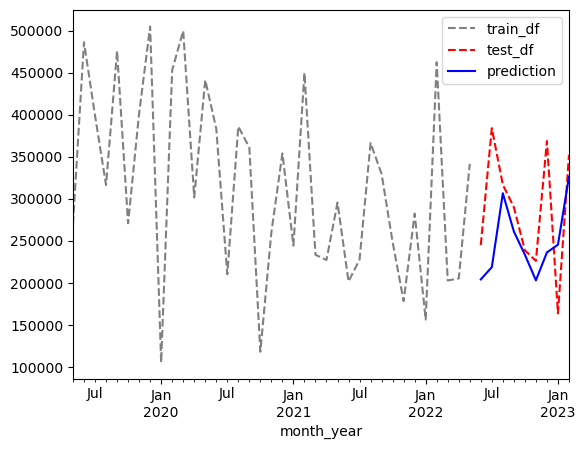

In [63]:
train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
sar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [64]:
print('Train RMSE:',mean_squared_error(train_df, sar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, sar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, sar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, sar_test_pred))

Train RMSE: 113852.02193284644
Test RMSE: 78471.41102054792
Train MAPE: 0.37021968492453167
Test MAPE: 0.19857351327254152


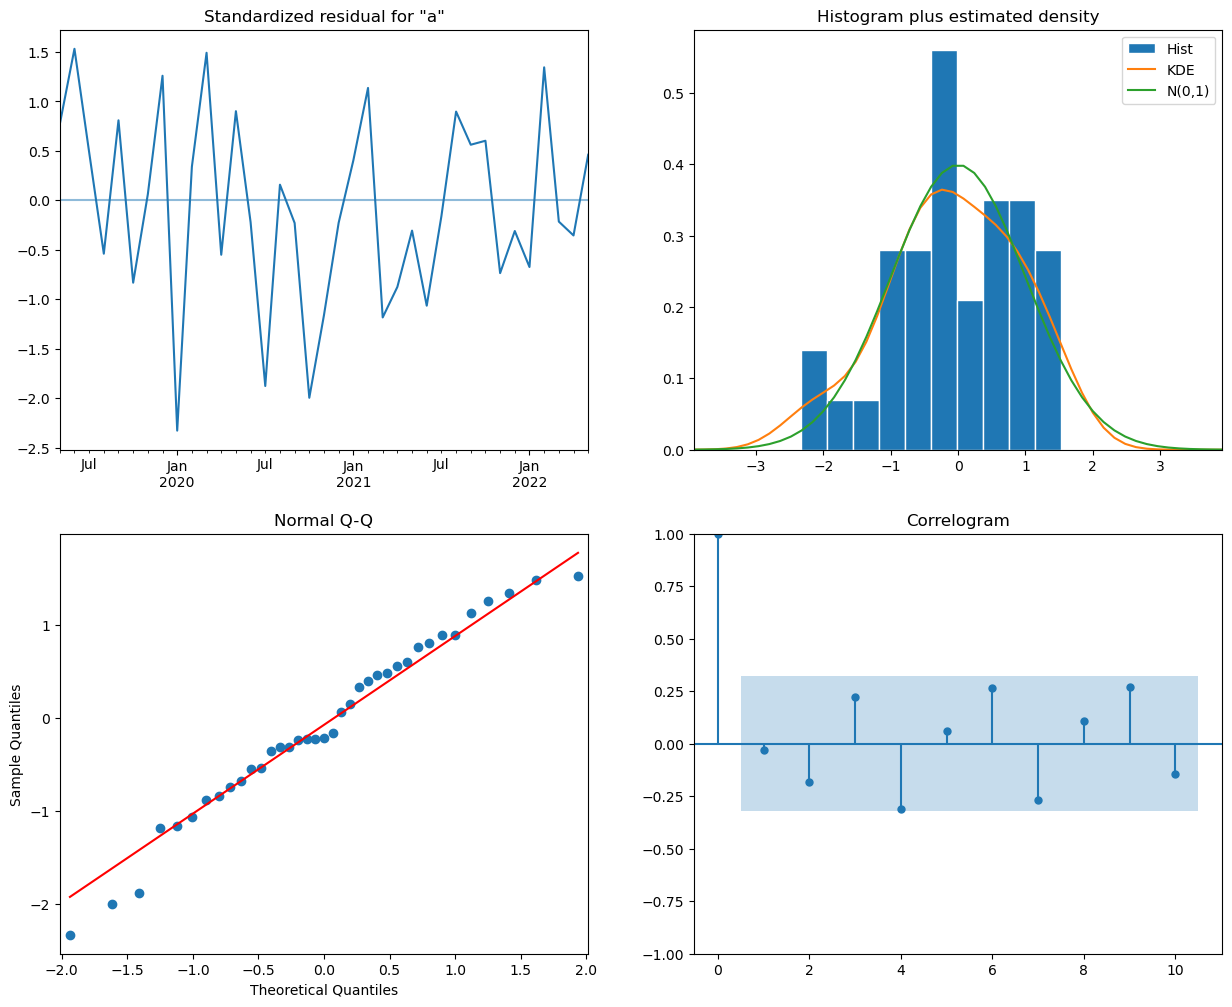

In [65]:
sar.plot_diagnostics(figsize=(15,12));

#### **Prophet**

The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

In [66]:
# converting the original dataframe into required format by prophet
prophet_df = amount_series.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.head()

,ds,y
0,2019-05-01,270234
1,2019-06-01,486171
2,2019-07-01,399120
3,2019-08-01,316251
4,2019-09-01,475672


In [67]:
# train test split data
prophet_train_df = prophet_df.iloc[:-9]
prophet_test_df = prophet_df.iloc[-9:]

In [69]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df) #fit training data to model

04:31:43 - cmdstanpy - INFO - Chain [1] start processing
04:31:43 - cmdstanpy - INFO - Chain [1] done processing
04:31:43 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\owner\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=74283 data file=C:\Users\owner\AppData\Local\Temp\tmpwctry94n\avmb1weu.json init=C:\Users\owner\AppData\Local\Temp\tmpwctry94n\huqkkka4.json output file=C:\Users\owner\AppData\Local\Temp\tmpwctry94n\prophet_modeltrm8csdq\prophet_model-20230918043143.csv method=optimize algorithm=newton iter=10000' failed: 

In [ ]:
future = prophet_model.make_future_dataframe(periods=9, freq='M')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
41,2022-09-30,217714.667988,65425.759786,197461.137058,217714.665570,217714.670251,-86978.861071,-86978.861071,-86978.861071,-86978.861071,-86978.861071,-86978.861071,0.0,0.0,0.0,130735.806917
42,2022-10-31,213292.626427,221089.099178,355746.611759,213292.623247,213292.629403,72911.320517,72911.320517,72911.320517,72911.320517,72911.320517,72911.320517,0.0,0.0,0.0,286203.946944
43,2022-11-30,209013.231368,381267.122616,503140.291913,209013.227387,209013.235142,233421.084941,233421.084941,233421.084941,233421.084941,233421.084941,233421.084941,0.0,0.0,0.0,442434.316309
44,2022-12-31,204591.189808,-250760.364401,-116793.531245,204591.184819,204591.194461,-386588.667923,-386588.667923,-386588.667923,-386588.667923,-386588.667923,-386588.667923,0.0,0.0,0.0,-181997.478115
45,2023-01-31,200169.148247,307109.787805,434195.789469,200169.142221,200169.153907,170852.502046,170852.502046,170852.502046,170852.502046,170852.502046,170852.502046,0.0,0.0,0.0,371021.650293


In [ ]:
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:-9]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[-9:]['yhat']

In [ ]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 50834.55897879725
Test RMSE: 182805.59500274016
Train MAPE: 0.15542466146959816
Test MAPE: 0.5566766147486704


#### **MODELS COMPARISION**

In [ ]:
comparision_df = pd.DataFrame(data=[['Single exp smoothing', 70722 , 0.2360],
                           ['double exp smoothing', 76647,  0.1790],
                          ['Triple exp smoothing', 108760, 0.3066],
                          ['ARIMA(5,0,5)', 99772, 0.3244],
                          ['SARIMAX', 78710, 0.1995],
                          ['prophet', 182805, 0.5567]], columns=['Model','RMSE','MAPE'])

comparision_df.set_index('Model', inplace=True)

In [ ]:
comparision_df.sort_values(by='MAPE')

,RMSE,MAPE
Model,,
double exp smoothing,76647,0.1790
SARIMAX,78710,0.1995
Single exp smoothing,70722,0.2360
Triple exp smoothing,108760,0.3066
"ARIMA(5,0,5)",99772,0.3244
prophet,182805,0.5567


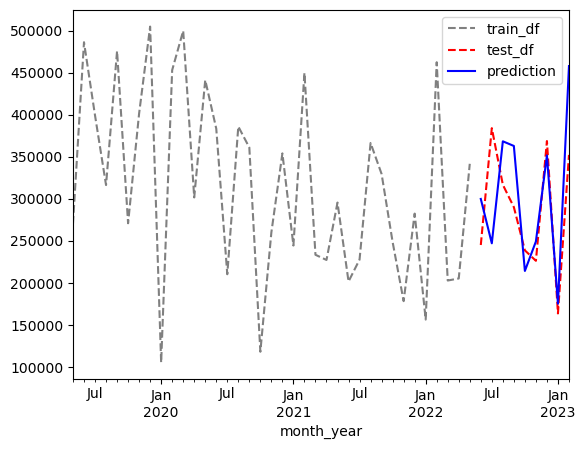

In [ ]:
# Hyperparameter tuning
from scipy.optimize import minimize

# Define the objective function to minimize (MSE in this case)
def objective(params, train_data):
    alpha, beta = params
    model = ExponentialSmoothing(train_data, trend='add', initialization_method='heuristic', seasonal='add', damped_trend=False)
    model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
    predictions = model_fit.fittedvalues
    mse = mean_squared_error(train_data, predictions)
    return mse


# Initial guess for hyperparameters
initial_guess = [0.5, 0.5] 

# Perform hyperparameter tuning using minimize
result = minimize(objective, initial_guess, args=(train_df,), bounds=[(0, 1), (0, 1)])

# Extract the optimal hyperparameters
optimal_alpha, optimal_beta = result.x

# Fit the model with the optimal hyperparameters
best_model = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', damped_trend=False)
best_model_fit = best_model.fit(smoothing_level=optimal_alpha, smoothing_slope=optimal_beta)

# Forecast using the best model
double_exp_test_pred = best_model_fit.forecast(steps=9)

train_df['amount'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['amount'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)

Test RMSE: 68684.30177696668


In [ ]:
import pickle

with open('predict_income.pkl', 'wb') as f:
  pickle.dump(best_model, f)

print("Done")

Done


## ATTENDANCE

In [ ]:
attendance_series = attendance_series.sort_index()
index =  pd.to_datetime(attendance_series.index)
attendance_series.index = index

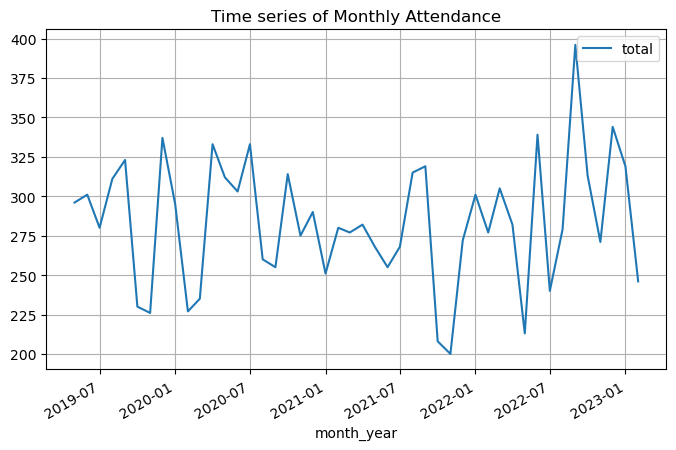

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
attendance_series.plot(kind='line', ax=ax, grid=True)
ax.set_title("Time series of Monthly Attendance")
plt.show()

**Time Series Decomposition:**   

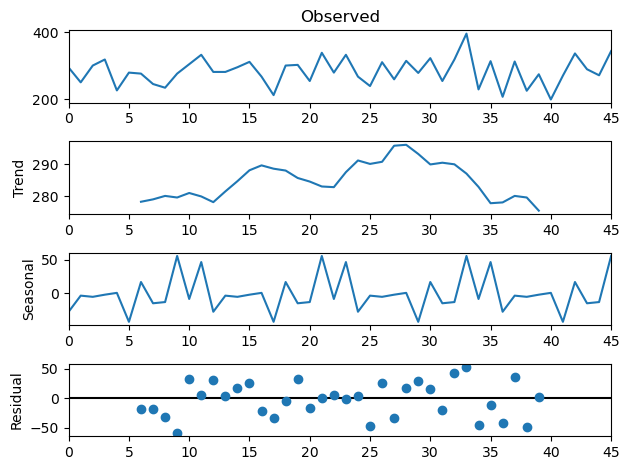

In [ ]:
decompose_add = seasonal_decompose(attendance_series.values, period=12)
decompose_add.plot()
plt.show()

**ADFuller Test:**

In [ ]:
adf_test(attendance_series.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -7.947331e+00
p-value                        3.193915e-12
#Lags Used                     0.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64


**Autocorrelation and Partial Autocorrelation Function:**

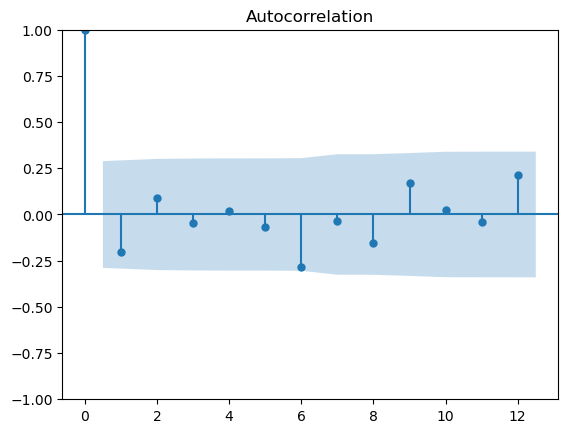

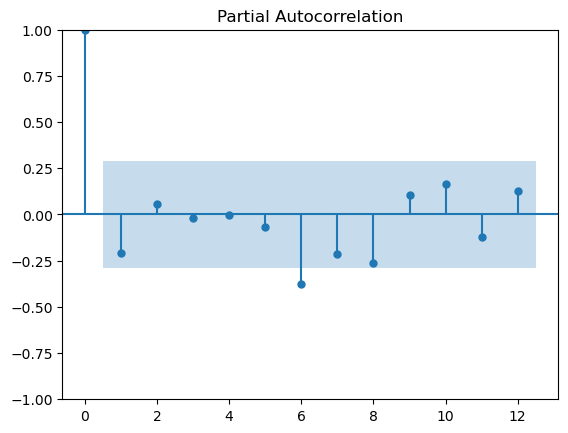

In [ ]:
plot_acf(attendance_series, lags=12);
plot_pacf(attendance_series, lags=12);

### Split dataset to Train and Test

In [ ]:
attendance_series.index = pd.to_datetime(attendance_series.index, format='%m/%Y')
attendance_series = attendance_series.sort_index()

In [ ]:
train_df = attendance_series.loc[:'2022-05-01']
test_df = attendance_series.loc['2022-06-01':]

In [ ]:
test_df.shape

(9, 1)

### Time series forecasting

#### **Exponential Smoothing:**

##### **Single Exponential Smoothing**

In [ ]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(9)

<AxesSubplot:xlabel='month_year'>

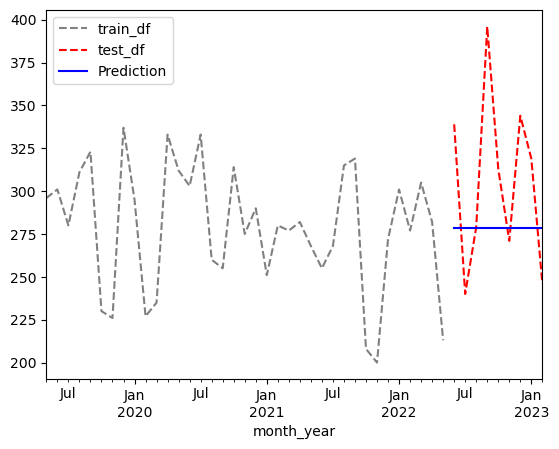

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 36.220704937607174
Test RMSE: 54.88886460209103
Train MAPE: 0.11108133914424971
Test MAPE: 0.1359865120639771


In [ ]:
single_exp.aic

269.63268770464117

##### **Double Exponential Smoothing**

In [ ]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(9)

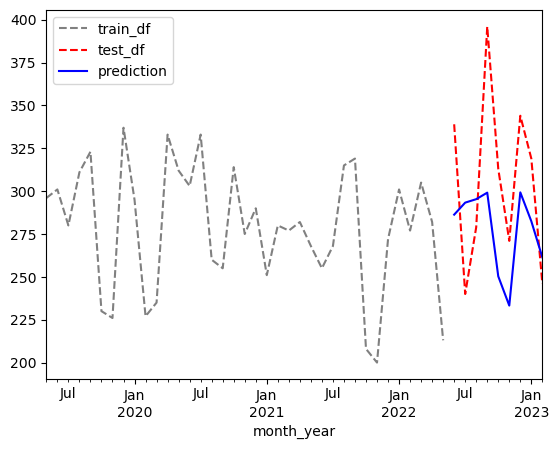

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 29.967682806049755
Test RMSE: 51.85131466838003
Train MAPE: 0.09845476247569278
Test MAPE: 0.14749390267346


In [ ]:
double_exp.aic

279.6088475305755

##### **Triple Exponential Smoothing**

In [ ]:
hw_model = ExponentialSmoothing(train_df['total'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(9)

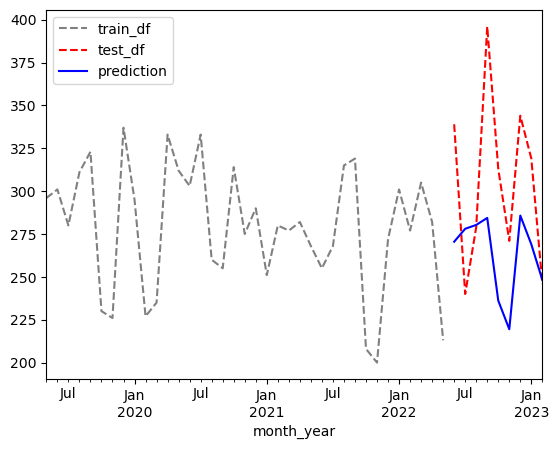

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, hw_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, hw_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, hw_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, hw_test_pred))

Train RMSE: 29.04504072977531
Test RMSE: 60.6069473433306
Train MAPE: 0.09367797403347423
Test MAPE: 0.15754465376540583


In [ ]:
double_exp.aic

279.6088475305755

#### **ARIMA**

In [ ]:
ar = ARIMA(train_df, order=(4,0,4)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(9)

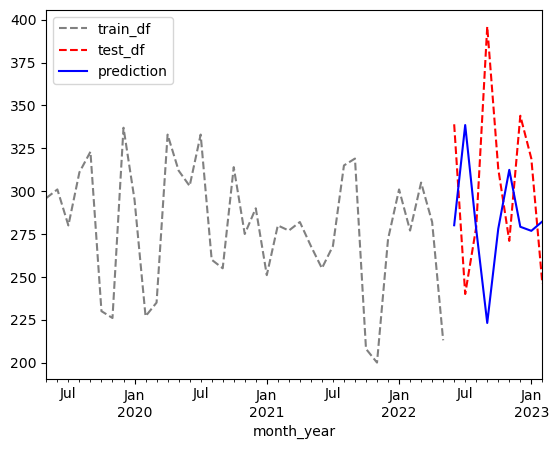

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 26.667390285073036
Test RMSE: 76.95845508757749
Train MAPE: 0.0820756664173714
Test MAPE: 0.19532715291600133


In [ ]:
ar.aic

368.6897366668877

In [ ]:
p = range(0, 4, 1)
d = 0
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 0, 0, 5, train_df)


  0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
result_df

,"(p,q)x(P,Q)",AIC
0,"(0, 3, 2, 2)",16.000000
1,"(1, 2, 3, 3)",20.000000
2,"(3, 1, 3, 3)",22.000000
3,"(3, 1, 0, 0)",377.465249
4,"(1, 3, 0, 0)",378.228117
...,...,...
250,"(0, 1, 0, 1)",468.364895
251,"(0, 0, 0, 2)",474.345808
252,"(0, 1, 0, 0)",482.337066
253,"(0, 0, 0, 1)",495.252725


In [ ]:
train_df

,total
month_year,
2019-05-01,296
2019-06-01,301
2019-07-01,280
2019-08-01,311
2019-09-01,323
2019-10-01,230
2019-11-01,226
2019-12-01,337
2020-01-01,295


In [ ]:
sar =  SARIMAX(train_df, order=(3, 0, 1), seasonal_order=(1, 0, 1, 12)).fit(dis=-1, maxiter=1000)
sar_train_pred = sar.fittedvalues
sar_test_pred = sar.forecast(9)

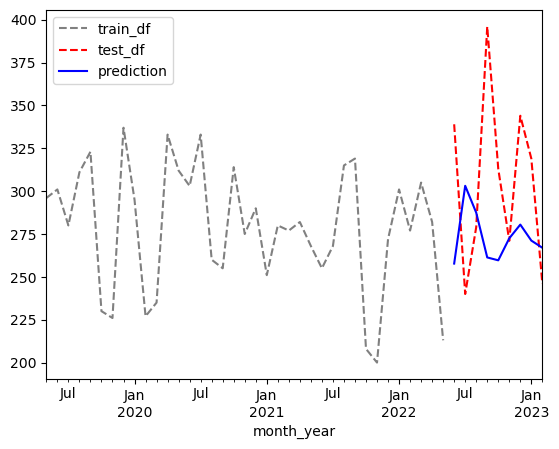

In [ ]:
train_df['total'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['total'].plot(style='--', color='r', legend=True, label='test_df')
sar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

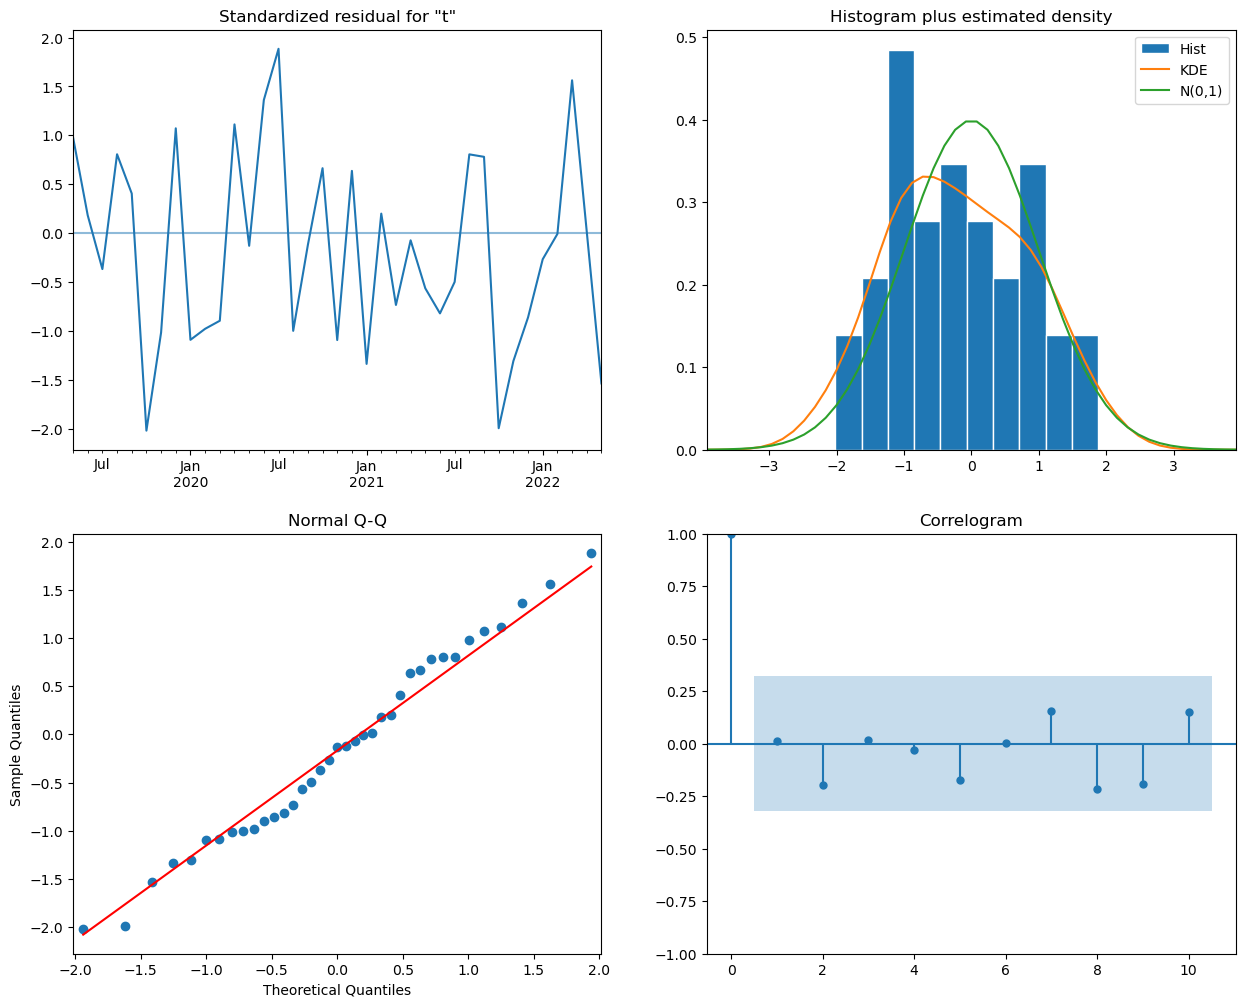

In [ ]:
sar.plot_diagnostics(figsize=(15,12));

#### **Prophet**

In [ ]:
# converting the original dataframe into required format by prophet
prophet_df = attendance_series.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.head()

,ds,y
0,2019-05-01,296
1,2019-06-01,301
2,2019-07-01,280
3,2019-08-01,311
4,2019-09-01,323


In [ ]:
# train test split data
prophet_train_df = prophet_df.iloc[:-9]
prophet_test_df = prophet_df.iloc[-9:]

In [ ]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df) #fit training data to model

06:31:18 - cmdstanpy - INFO - Chain [1] start processing
06:31:19 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=9, freq='M')
prophet_predictions = prophet_model.predict(future)

In [ ]:
prophet_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
41,2022-09-30,241.666817,95.228520,146.315223,241.666816,241.666817,-121.205875,-121.205875,-121.205875,-121.205875,-121.205875,-121.205875,0.0,0.0,0.0,120.460941
42,2022-10-31,240.617045,122.297786,173.361826,240.617044,240.617047,-91.962968,-91.962968,-91.962968,-91.962968,-91.962968,-91.962968,0.0,0.0,0.0,148.654077
43,2022-11-30,239.601138,314.557190,367.207326,239.601137,239.601139,102.051285,102.051285,102.051285,102.051285,102.051285,102.051285,0.0,0.0,0.0,341.652423
44,2022-12-31,238.551367,252.547877,306.014322,238.551365,238.551369,41.665531,41.665531,41.665531,41.665531,41.665531,41.665531,0.0,0.0,0.0,280.216898
45,2023-01-31,237.501596,85.883132,139.173425,237.501594,237.501598,-124.341836,-124.341836,-124.341836,-124.341836,-124.341836,-124.341836,0.0,0.0,0.0,113.159760


In [ ]:
plot_plotly(prophet_model, prophet_predictions)

In [ ]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:-9]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[-9:]['yhat']

In [ ]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 20.250853206648348
Test RMSE: 95.45431289535098
Train MAPE: 0.061520214590199476
Test MAPE: 0.2618213983644171


In [ ]:
import pickle

with open('predict_attendance.pkl', 'wb') as f:
  pickle.dump(ar, f)

print("Done")

Done


In [ ]:
comparision_df = pd.DataFrame(data=[['Single exp smoothing', 53.4436 , 0.1640],
                           ['double exp smoothing', 52.3209,  0.1608],
                          ['Triple exp smoothing', 51.4796, 0.1598],
                          ['ARIMA(4,0,4)', 61.0922, 0.1815],
                          ['prophet', 118.1606, 0.3639]], columns=['Model','RMSE','MAPE'])

comparision_df.set_index('Model', inplace=True)

In [ ]:
comparision_df.sort_values(by='MAPE')

,RMSE,MAPE
Model,,
Triple exp smoothing,51.4796,0.1598
double exp smoothing,52.3209,0.1608
Single exp smoothing,53.4436,0.1640
"ARIMA(4,0,4)",61.0922,0.1815
prophet,118.1606,0.3639
